In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import numpy as np
yf.pdr_override()
import matplotlib.pyplot as plt
from math import sqrt
from math import floor
from datetime import datetime

In [2]:
ticker = yf.download('^IXIC',start ="2010-01-20", end  = "2023-05-01" )['Close']
ticker1 = yf.download('^NSEI',start ="2010-01-01", end  = "2023-04-11")['Close']
ticker.corr(ticker1)
# correlation of nasdaq and nse 
## the direction we are moving is positive and strength is quite high 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0.9512481243372104

In [3]:
ticker.corr(ticker1.shift())
#taking nasdaq as lagging and nse as leading 


0.950682511458961

In [4]:
ticker.corr(ticker1.shift(20))
#we get that the correlation decreases so this not the correct lead lag relationship

0.9411931324659544

In [5]:
ticker1.corr(ticker.shift())

0.9515490820200023

In [6]:
ticker1.corr(ticker.shift(155))
# this is the max correlation we are getting for any time period 

0.9676574164593844

In [7]:
ticker1.corr(ticker.shift(20))
# but as we are constrained with taking 20 days as the lagging period so we have to take this as max in our case 
#as we can see nasdaq is behind so nasdaq is leading and nse is lagging

0.9531303455496966

In [8]:
# I think nasdaq should be chosen for optimisating parameters as the nse future data is dependent on the movement of stocks in nasdaq

In [9]:
# code for macd lines
df = yf.download("^NSEI","2010-01-01" ,"2023-05-01")
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    frames =  [macd, signal]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

df_macd = get_macd(df['Close'], 26, 12, 9)
df_macd.tail()

[*********************100%***********************]  1 of 1 completed


,Close,Close
Date,,
2023-04-24,89.150961,58.377980
2023-04-25,95.090728,65.720530
2023-04-26,102.198597,73.016143
2023-04-27,114.695755,81.352066
2023-04-28,135.141663,92.109985


In [10]:
# code for buy and sell dates for nasdaq for  macd lines 
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data.iloc[:,0][i] > data.iloc[:,1][i]:
            if signal != 1:
                buy_price.append(prices.index[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data.iloc[:,0][i] < data.iloc[:,1][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices.index[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(df['Close'], df_macd)
buy_price= [incom for incom in buy_price if str(incom) != 'nan']
buy_date = buy_price[0 : -1]
t = []
for i in range(len(buy_date)):
    stamp = str(buy_date[i])
    date = stamp.split()[0]
    t.append(date)
print(t)

['2010-01-05', '2010-01-15', '2010-02-16', '2010-05-31', '2010-07-12', '2010-08-19', '2010-09-06', '2010-11-04', '2010-12-03', '2010-12-14', '2011-02-15', '2011-03-23', '2011-05-30', '2011-06-27', '2011-07-25', '2011-08-30', '2011-09-29', '2011-10-10', '2011-12-02', '2011-12-27', '2012-01-03', '2012-04-03', '2012-04-18', '2012-05-28', '2012-08-02', '2012-09-12', '2012-11-29', '2013-01-03', '2013-01-15', '2013-01-17', '2013-03-07', '2013-04-16', '2013-07-01', '2013-08-30', '2013-10-09', '2013-10-30', '2013-12-02', '2013-12-24', '2014-01-15', '2014-02-18', '2014-04-09', '2014-05-12', '2014-06-05', '2014-07-04', '2014-07-22', '2014-08-18', '2014-10-22', '2015-01-02', '2015-01-09', '2015-02-19', '2015-03-03', '2015-04-06', '2015-05-14', '2015-06-18', '2015-08-06', '2015-09-11', '2015-11-27', '2015-12-17', '2016-01-29', '2016-02-22', '2016-03-01', '2016-04-13', '2016-05-26', '2016-07-04', '2016-08-31', '2016-10-24', '2016-11-29', '2016-12-29', '2017-02-22', '2017-03-15', '2017-04-05', '2017

In [11]:
sell_price= [incom for incom in sell_price if str(incom) != 'nan']
sell_date = sell_price[:]
sell_date
l = []
for i in range(len(sell_date)):
    stamp = str(sell_date[i])
    date = stamp.split()[0]
    l.append(date)
print(l)    

['2010-01-12', '2010-01-19', '2010-04-12', '2010-07-02', '2010-07-28', '2010-08-25', '2010-10-08', '2010-11-12', '2010-12-09', '2011-01-07', '2011-03-21', '2011-04-18', '2011-06-16', '2011-07-18', '2011-07-26', '2011-09-26', '2011-10-03', '2011-11-11', '2011-12-12', '2011-12-30', '2012-02-23', '2012-04-09', '2012-04-24', '2012-07-13', '2012-08-29', '2012-10-09', '2012-12-17', '2013-01-10', '2013-01-16', '2013-01-24', '2013-03-20', '2013-05-23', '2013-07-26', '2013-09-30', '2013-10-28', '2013-11-06', '2013-12-16', '2014-01-02', '2014-01-27', '2014-04-07', '2014-04-15', '2014-05-30', '2014-06-16', '2014-07-08', '2014-08-01', '2014-09-15', '2014-12-02', '2015-01-07', '2015-02-05', '2015-02-23', '2015-03-09', '2015-04-21', '2015-06-03', '2015-07-27', '2015-08-10', '2015-10-29', '2015-12-07', '2016-01-07', '2016-02-10', '2016-02-25', '2016-04-06', '2016-04-29', '2016-06-13', '2016-08-01', '2016-09-14', '2016-10-26', '2016-12-22', '2017-02-15', '2017-02-27', '2017-03-22', '2017-04-07', '2017

In [12]:
total = pd.DataFrame()
for i in range(len(buy_date)):
    mask9 = (df.index > t[i]) & (df.index <= l[i])
    mask10 =df.loc[mask9]
    frames = [total,mask10]
    result = pd.concat(frames)
    print(result)
    mask9 = []

                   Open         High          Low        Close    Adj Close   
Date                                                                          
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805  \
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   
2010-01-11  5263.799805  5287.200195  5227.799805  5249.399902  5249.399902   
2010-01-12  5251.100098  5300.500000  5200.950195  5210.399902  5210.399902   

            Volume  
Date                
2010-01-06       0  
2010-01-07       0  
2010-01-08       0  
2010-01-11       0  
2010-01-12       0  
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2010-01-18  5253.649902  5292.500000  5228.950195  5274.850098  5274.850098  \
2010-01-19  5274.200195  5287.799805  5218.649902  5225.649902

[*********************100%***********************]  1 of 1 completed


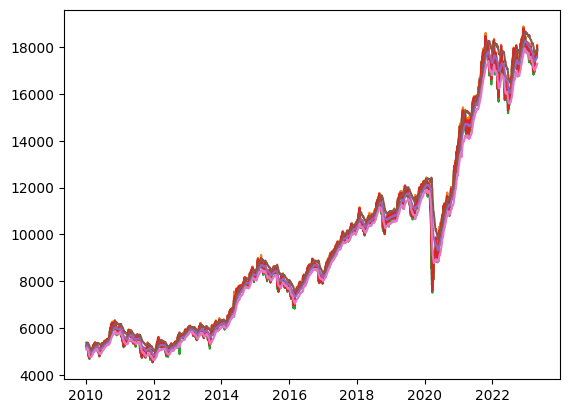

In [13]:
# code for keltner channel and graph of the same 
intc = yf.download("^NSEI","2010-01-01" ,"2023-05-01")
def get_kc(high, low, close, lookback_period, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    middle = close.ewm(lookback_period).mean()
    upper = close.ewm(lookback_period).mean() + multiplier * atr
    lower = close.ewm(lookback_period).mean() - multiplier * atr
    
    return middle, upper, lower
    
intc = intc.iloc[:,:4]
intc['middle'], intc['upper'], intc['lower'] = get_kc(intc['High'], intc['Low'], intc['Close'], 20, 2, 10)
plt.plot(intc)
plt.show()


In [32]:
# stratergy for calculating buy and sell dates in keltner channel .
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_date = []
    sell_date = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_date.append(prices.index[i])
                sell_date.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_date.append(np.nan)
                sell_date.append(prices.index[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                kc_signal.append(0)
        else:
            buy_date.append(np.nan)
            sell_date.append(np.nan)
            kc_signal.append(0)
            
    return buy_date, sell_date, kc_signal

buy_date, sell_date, kc_signal = implement_kc_strategy(intc['Close'], intc['upper'], intc['lower'])
sell_date= [incom for incom in sell_date if str(incom) != 'nan']
print(len(sell_date))
x = []
for i in range(len(sell_date)):
    stamp = str(sell_date[i])
    date = stamp.split()[0]
    x.append(date)
print(x) 

27
['2010-03-08', '2010-06-21', '2011-03-31', '2011-07-07', '2011-10-28', '2012-01-20', '2012-06-29', '2013-04-25', '2013-07-15', '2013-09-19', '2014-02-28', '2015-01-29', '2015-07-06', '2015-10-19', '2016-03-23', '2017-01-12', '2018-04-24', '2018-12-19', '2019-05-20', '2019-09-23', '2020-06-03', '2020-10-14', '2022-01-05', '2022-04-04', '2022-07-22', '2022-11-01', '2023-04-13']


In [33]:
buy_date= [incom for incom in buy_date if str(incom) != 'nan']
print(len(buy_date))
y = []
for i in range(len(buy_date)):
    stamp = str(buy_date[i])
    date = stamp.split()[0]
    y.append(date)
print(y) 

27
['2010-01-27', '2010-05-07', '2011-01-11', '2011-05-05', '2011-08-09', '2011-11-21', '2012-05-04', '2013-02-26', '2013-06-13', '2013-08-02', '2014-02-04', '2014-12-17', '2015-03-27', '2015-08-24', '2015-11-13', '2016-11-04', '2018-03-07', '2018-09-24', '2019-05-13', '2019-07-25', '2020-02-03', '2020-09-24', '2021-11-26', '2022-02-14', '2022-05-13', '2022-09-29', '2022-12-23']


In [37]:
total = pd.DataFrame()
for i in range(len(buy_date)):
    mask92 = (df.index > y[i]) & (df.index <= x[i])
    mask93 =df.loc[mask92]
    frames = [total,mask93]
    result_kc = pd.concat(frames)
    print(result_kc)

                   Open         High          Low        Close    Adj Close   
Date                                                                          
2010-01-28  4863.000000  4929.899902  4824.950195  4867.250000  4867.250000  \
2010-01-29  4866.149902  4893.700195  4766.000000  4882.049805  4882.049805   
2010-02-01  4882.049805  4918.799805  4827.149902  4899.700195  4899.700195   
2010-02-02  4907.850098  4951.149902  4814.100098  4830.100098  4830.100098   
2010-02-03  4831.000000  4949.149902  4831.000000  4931.850098  4931.850098   
2010-02-04  4931.299805  4931.299805  4832.350098  4845.350098  4845.350098   
2010-02-05  4819.649902  4827.000000  4692.350098  4718.649902  4718.649902   
2010-02-08  4755.350098  4799.049805  4675.399902  4760.399902  4760.399902   
2010-02-09  4760.549805  4810.399902  4739.350098  4792.649902  4792.649902   
2010-02-10  4793.000000  4826.850098  4748.100098  4757.200195  4757.200195   
2010-02-11  4757.250000  4843.799805  4757.250000  4

In [16]:
mask9 = (df.index > '2010-01-27') & (df.index <= '2010-03-08')
mask10 =df.loc[mask9]

[*********************100%***********************]  1 of 1 completed


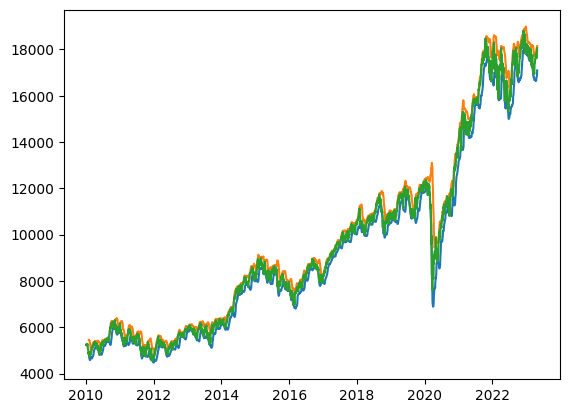

In [17]:
# code for bollinder bands and its graph
tickered =yf.download("^NSEI","2010-01-01" ,"2023-05-01")
def bollinger_bands(df, n):
    data = df['Close']
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    BU = pd.Series((B_MA + 2 * sigma), name='BU')
    BL = pd.Series((B_MA - 2* sigma), name='BL')
    df['bbl'] = df.index.map(BL)
    df['bbh'] = df.index.map(BU)
    df["B_MA"] =df.index.map(B_MA)
    return df
t = bollinger_bands(tickered,20)
plt.plot(t['bbl'])
plt.plot(t['bbh'])
plt.plot(t['Close'])
plt.show()

In [18]:
# stratergy for bollinder bands for getting buy and sell dates 
def implement_bb_strategy(prices, bb_upper, bb_lower):
    buy_date = []
    sell_date = []
    bb_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if prices[i] < bb_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_date.append(prices.index[i])
                sell_date.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                bb_signal.append(0)
        elif prices[i] > bb_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_date.append(np.nan)
                sell_date.append(prices.index[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                bb_signal.append(0)
        else:
            buy_date.append(np.nan)
            sell_date.append(np.nan)
            bb_signal.append(0)
            
    return buy_date, sell_date, bb_signal

buy_date1, sell_date1, bb_signal = implement_bb_strategy(t['Close'], t['bbh'], t['bbl'])
buy_date1= [incom for incom in buy_date if str(incom) != 'nan']
buy_date1
a = []
for i in range(len(buy_date1)):
    stamp = str(buy_date1[i])
    date = stamp.split()[0]
    a.append(date)
print(a)

['2010-01-27', '2010-05-07', '2011-01-11', '2011-05-05', '2011-08-09', '2011-11-21', '2012-05-04', '2013-02-26', '2013-06-13', '2013-08-02', '2014-02-04', '2014-12-17', '2015-03-27', '2015-08-24', '2015-11-13', '2016-11-04', '2018-03-07', '2018-09-24', '2019-05-13', '2019-07-25', '2020-02-03', '2020-09-24', '2021-11-26', '2022-02-14', '2022-05-13', '2022-09-29', '2022-12-23']


In [19]:
sell_date1= [incom for incom in sell_date1 if str(incom) != 'nan']
sell_date1
b = []
for i in range(len(sell_date1)):
    stamp = str(sell_date1[i])
    date = stamp.split()[0]
    b.append(date)
print(b)

['2010-03-03', '2010-07-13', '2011-03-31', '2011-10-28', '2012-01-17', '2012-06-08', '2012-09-17', '2012-11-30', '2013-04-25', '2013-09-11', '2014-11-28', '2015-07-17', '2016-05-30', '2017-01-27', '2017-07-13', '2017-09-12', '2018-01-15', '2018-07-12', '2019-09-23', '2020-06-03', '2020-11-11', '2021-07-15', '2022-01-05', '2022-07-08', '2022-11-01']


In [20]:
total1 = pd.DataFrame()
for i in range(len(buy_date)):
    mask67 = (t.index > a[i]) & (t.index <= b[i])
    mask68 =t.loc[mask67]
    frames = [total1,mask68]
    resulting = pd.concat(frames)
    print(resulting)

                   Open         High          Low        Close    Adj Close   
Date                                                                          
2010-01-28  4863.000000  4929.899902  4824.950195  4867.250000  4867.250000  \
2010-01-29  4866.149902  4893.700195  4766.000000  4882.049805  4882.049805   
2010-02-01  4882.049805  4918.799805  4827.149902  4899.700195  4899.700195   
2010-02-02  4907.850098  4951.149902  4814.100098  4830.100098  4830.100098   
2010-02-03  4831.000000  4949.149902  4831.000000  4931.850098  4931.850098   
2010-02-04  4931.299805  4931.299805  4832.350098  4845.350098  4845.350098   
2010-02-05  4819.649902  4827.000000  4692.350098  4718.649902  4718.649902   
2010-02-08  4755.350098  4799.049805  4675.399902  4760.399902  4760.399902   
2010-02-09  4760.549805  4810.399902  4739.350098  4792.649902  4792.649902   
2010-02-10  4793.000000  4826.850098  4748.100098  4757.200195  4757.200195   
2010-02-11  4757.250000  4843.799805  4757.250000  4

IndexError: list index out of range

In [21]:
#code of the metrices retrieved from assignment 1
Indices=pd.DataFrame(index=["Cumulative Returns","Volatility","Sharpe ratio","Sortino ratio","MDD","MACD"],columns=['^IXIC','^NSEI'])
for stock in Indices.columns:
    stok=yf.download(stock,start="2010-01-01",end="2023-05-01")
    
    closing_price=stok["Close"]
    opening_price=stok["Open"]
    daily_returns=(closing_price-opening_price)/closing_price

    final_price=stok.iloc[-1]["Close"]
    original_price=stok.iloc[0]["Open"]

    cumulative=(final_price-original_price)/original_price
    Indices.at["Cumulative Returns",stock]=cumulative
    rfrate = 0.0525
    std=daily_returns.std()
    time_period=stok.shape[0]
    volatility=std*sqrt(time_period)
    Indices.at["Volatility",stock]=volatility

    excess=daily_returns-rfrate
    sharpe=excess.mean()/excess.std()

    Indices.at["Sharpe ratio",stock]=sharpe
    
    negative_returns=daily_returns[daily_returns<0]
    sortino=excess.mean()/negative_returns.std()

    Indices.at["Sortino ratio",stock]=sortino

    peak=closing_price.max()
    index=list(np.where(closing_price==peak))
    index=index[0][0]

    indices=closing_price.index
    peak_day=indices[index]

    peak_day=peak_day.strftime("%Y-%m-%d")

    stck_later=stok.loc[peak_day:"2023-04-26",:]
    minimum=stck_later["Close"].min()
    Mdd=(minimum-peak)/peak*100

    Indices.at["MDD",stock]=Mdd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
Indices

,^IXIC,^NSEI
Cumulative Returns,4.328856,2.473437
Volatility,0.586643,0.523497
Sharpe ratio,-5.167094,-5.81691
Sortino ratio,-6.616088,-8.039478
MDD,-36.39528,-9.92664
MACD,NaN,NaN


In [39]:
#for ketlner code sharpe ratio, cumulative returns
stok = result_kc
closing_price=stok["Close"]
opening_price=stok["Open"]
daily_returns=(closing_price-opening_price)/closing_price

final_price=stok.iloc[-1]["Close"]
original_price=stok.iloc[0]["Open"]

cumulative=(final_price-original_price)/original_price
rfrate = 0.0525
std=daily_returns.std()
time_period=stok.shape[0]
volatility=std*sqrt(time_period)

excess=abs(daily_returns-rfrate)
sharpe=excess.mean()/excess.std()
print(sharpe)
print(cumulative)
peak=closing_price.max()
index=list(np.where(closing_price==peak))
index=index[0][0]

indices=closing_price.index
peak_day=indices[index]

peak_day=peak_day.strftime("%Y-%m-%d")

stck_later=stok.loc[:]
minimum=stck_later["Close"].min()
Mdd=(minimum-peak)/peak*100
print(Mdd)

8.558405279397952
-0.0001346234841850268
-7.061546217241528


In [24]:
## for bollinder bands sharpe ratio, cumulative returns, Mdd

In [29]:
stok = resulting
closing_price=stok["Close"]
opening_price=stok["Open"]
daily_returns=(closing_price-opening_price)/closing_price

final_price=stok.iloc[-1]["Close"]
original_price=stok.iloc[0]["Open"]

cumulative=(final_price-original_price)/original_price
rfrate = 0.0525
std=daily_returns.std()
time_period=stok.shape[0]
volatility=std*sqrt(time_period)

excess=abs(daily_returns-rfrate)
sharpe=excess.mean()/excess.std()
print(sharpe)
print(cumulative)
peak=closing_price.max()
index=list(np.where(closing_price==peak))
index=index[0][0]

indices=closing_price.index
peak_day=indices[index]

peak_day=peak_day.strftime("%Y-%m-%d")

stck_later=stok.loc[:]
minimum=stck_later["Close"].min()
Mdd=(minimum-peak)/peak*100
print(Mdd)

6.617751811691376
0.14517427078142137
-15.716932827221946


In [26]:
# macd line sharpe ratio , Mdd , cumulative returns 

In [27]:
stok = result
closing_price=stok["Close"]
opening_price=stok["Open"]
daily_returns=(closing_price-opening_price)/closing_price

final_price=stok.iloc[-1]["Close"]
original_price=stok.iloc[0]["Open"]

cumulative=(final_price-original_price)/original_price
rfrate = 0.0525
std=daily_returns.std()
time_period=stok.shape[0]
volatility=std*sqrt(time_period)

excess=abs(daily_returns-rfrate)
sharpe=excess.mean()/excess.std()
print(sharpe)
print(cumulative)
peak=closing_price.max()
index=list(np.where(closing_price==peak))
index=index[0][0]

indices=closing_price.index
peak_day=indices[index]

peak_day=peak_day.strftime("%Y-%m-%d")

stck_later=stok.loc[:]
minimum=stck_later["Close"].min()
Mdd=(minimum-peak)/peak*100
print(Mdd)

8.845707063311922
-0.03475963509240831
-2.4747512040751176


In [28]:
# I was unable to optimise the paramters .